<a href="https://colab.research.google.com/github/EsquivelJC/hacking-civico/blob/master/proyecto/proyecto_hacking_civico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto para el curso de Datos Abiertos y Hacking Cívico**
por Juan Carlos Esquivel Rangel

El presente trabajo explora datos referentes a accidentes automovilísticos en el Monterrey, Nuevo León, en busca de saber cantidades de muertos y/o lesionados de vialidades específicas, con el fin de saber si en estas se pueden implementar medidas para disminuir futuros accidentes.

El archivo csv se puede encontrar en el siguiente enlace: [De click aquí.](http://portal.monterrey.gob.mx/transparencia/DatosAbiertos1.html)

In [14]:
#Importación de librerías
import io
import statistics
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [15]:
#Importación de archivos
from google.colab import files
data_to_load = files.upload()

Saving SSPV_07_2020_Estadistica2016_2020.csv to SSPV_07_2020_Estadistica2016_2020 (1).csv


In [16]:
#Carga de los datos
dataAA = pd.read_csv('SSPV_07_2020_Estadistica2016_2020.csv', encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#Primeras 5 filas con como previo de la tabla con sus columnas
dataAA.head()

,fecha,hora,Nombre_de_la_vialidad,cruce,sentido,clave_de_la_localidad,Nombre_de_la_localiad,clave_del_municipio,Nombre_del_municipio_o_delegaciNo,clave_de_la_entidad_federativa,Nombre_de_la_entidad_federativa,vehiculo_principal,vehiculo_secundario,vehiculo_terciario,tipo_de_incidente,causa,situacion_climatica,situacion_del_pavimento,tipo_de_via,estatus_de_licencia,edad,genero,uso_de_cinturon,por_alcohol,dictamen,arresto,lesionados,muertos
0,03/10/2019,21:28,Garza Sada,Via Alcala,SD,1,Monterrey,39,Monterrey,19,Nuevo León,Automóvil Privado,Automóvil Privado,NaN,De Reversa,Estado De Alcoholismo,Lluvia,Resbaloso,Zona De Tránsito Calmado,Vigente,59,M,NaN,Si,Ebrio Completo,Si,0,0
1,03/05/2017,20:46,Leones,Paseo De La Cordillera,Oriente-Poniente,1,Monterrey,39,Monterrey,19,Nuevo León,Automóvil Privado,Automóvil Privado,NaN,De Reversa,Estado De Alcoholismo,Seco,Normal,Zona De Tránsito Calmado,Vencida Más De Un Año,58,M,NaN,Si,Ebrio Completo,Si,0,0
2,23/02/2017,23:09,Los Angeles,Felix U Gomez,SD,1,Monterrey,39,Monterrey,19,Nuevo León,Automóvil Privado,NaN,NaN,Estrellamiento,Estado De Alcoholismo,Seco,Normal,Zona De Tránsito Calmado,Vigente,33,M,NaN,Si,Ebrio Completo,NaN,1,0
3,05/01/2018,06:20,Madero,Vallarta,Norte-Sur,1,Monterrey,39,Monterrey,19,Nuevo León,Automóvil Privado,NaN,NaN,Estrellamiento,Estado De Alcoholismo,Seco,Normal,Zona De Tránsito Calmado,Vigente,29,M,NaN,Si,Ebrio Completo,NaN,0,0
4,10/06/2018,01:25,Madero,Santa Catarina Int Estac Motel,Norte-Sur,1,Monterrey,39,Monterrey,19,Nuevo León,Automóvil Privado,Automóvil Privado,NaN,Lateral,Estado De Alcoholismo,Seco,Normal,Zona De Tránsito Calmado,Vigente,SD,M,NaN,Si,Ebrio Completo,NaN,0,0


In [18]:
#Utilizamos shape para ver el tamaño de las columnas y las filas
print('Número de filas: {}'.format(dataAA.shape[0]))
print('Número de columnas: {}'.format(dataAA.shape[1]))

Número de filas: 125816
Número de columnas: 28


In [19]:
#Utilizamos info para ver los tipos de las columnas
dataAA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125816 entries, 0 to 125815
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   fecha                              125816 non-null  object
 1   hora                               125816 non-null  object
 2   Nombre_de_la_vialidad              125816 non-null  object
 3   cruce                              125816 non-null  object
 4   sentido                            125816 non-null  object
 5   clave_de_la_localidad              125816 non-null  int64 
 6   Nombre_de_la_localiad              125816 non-null  object
 7   clave_del_municipio                125816 non-null  object
 8   Nombre_del_municipio_o_delegaciNo  125816 non-null  object
 9   clave_de_la_entidad_federativa     125816 non-null  int64 
 10  Nombre_de_la_entidad_federativa    125816 non-null  object
 11  vehiculo_principal                 125814 non-null  

# Utilización de datos para resolver dudas



**¿Cuántos son los muertos y lesionados correspondientes a cada causa?**
Los siguientes 2 bloques de código son específicamente para ver la cantidad de muertos y lesionados correspondientes a cada tipo de causa registrado en los datos.

In [112]:
dataAA.groupby('causa').muertos.sum().sort_values(ascending=False)

causa
Otro                        122
Invasión De Carril            4
Exceso De Velocidad           4
Estado De Alcoholismo         3
Distracción                   2
No Respetó Señalamientos      1
No Respetó Semáforo           1
No Guardó Distancia           1
Giro Indebido                 1
Sentido Contrario             0
SD                            0
No Respetó Autoridad          0
Exceso De Dimensiones         0
Name: muertos, dtype: int64

In [23]:
dataAA.groupby('causa').lesionados.sum().sort_values(ascending=False)

causa
Otro                        2814
No Respetó Señalamientos     220
No Guardó Distancia          206
No Respetó Semáforo          193
Invasión De Carril           157
Exceso De Velocidad          124
Estado De Alcoholismo         90
Distracción                   32
Sentido Contrario             27
Giro Indebido                 24
No Respetó Autoridad           3
SD                             0
Exceso De Dimensiones          0
Name: lesionados, dtype: int64

**¿Cuántos son los muertos y lesionados correspondientes a cada vialidad?**
Los siguientes 2 bloques de código son específicamente para ver la cantidad de muertos y lesionados correspondientes a las 10 principales vialidades con mayores números.

In [63]:
dataAA.groupby('Nombre_de_la_vialidad').muertos.sum().sort_values(ascending=False)[:10]

Nombre_de_la_vialidad
Constitucion          9
Garza Sada            9
Lazaro Cardenas       7
Felix U Gomez         6
Rodrigo Gomez         6
Carretera Nacional    5
Ruiz Cortines         4
Lincoln               4
Morones Prieto        4
Gonzalitos            3
Name: muertos, dtype: int64

In [64]:
dataAA.groupby('Nombre_de_la_vialidad').lesionados.sum().sort_values(ascending=False)[:10]

Nombre_de_la_vialidad
Lincoln           165
Garza Sada        139
Leones            132
Ruiz Cortines     127
Morones Prieto    112
Aztlan            111
Bernardo Reyes    104
Constitucion       92
Madero             88
Colon              87
Name: lesionados, dtype: int64

**La siguiente gráfica es para ver la proporción de las causas de los accidentes, excluyendo 'Otro', dado a que pueden ser considerados valores en blanco, un detalle de que los datos ingresados en este archivo tienden a no ser ingresados siguiendo un protocolo.**

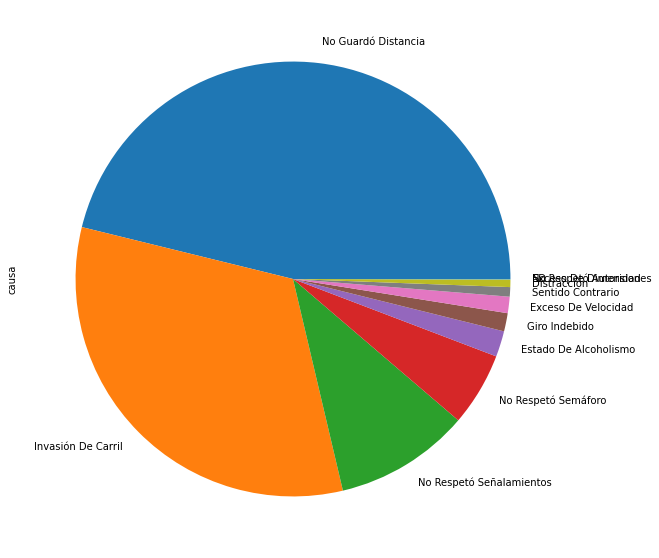

In [114]:
newdataAA = dataAA.loc[dataAA['causa'] != 'Otro']
newdataAA['causa'].value_counts().plot(kind='pie', figsize=(10,10))

**¿Qué vehículos son los más principales involucrados en accidentes?**

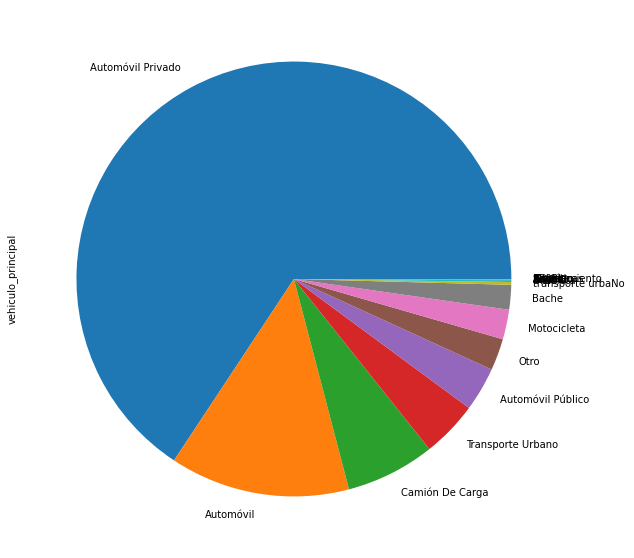

In [115]:
dataAA['vehiculo_principal'].value_counts().plot(kind='pie', figsize=(10,10))

**¿Qué género está más involucrado en los accidentes?**
**Los siguientes 2 cuadros de texto es para ver el porcentaje de accidentes en base a género**

In [99]:
dataAA['genero'].value_counts(normalize=True)

M       0.766931
F       0.231709
Huyó    0.001360
Name: genero, dtype: float64

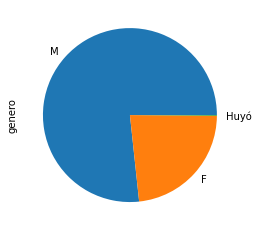

In [116]:
dataAA['genero'].value_counts().plot(kind='pie')

**¿Qué porcentaje fue causado por la influencia del alcohol?**
**Los siguientes 2 cuadros de texto es para ver el porcentaje de accidentes y si fue causado por la ingerencia de alcohol**

In [101]:
dataAA['por_alcohol'].value_counts(normalize=True)

No    0.92377
Si    0.07623
Name: por_alcohol, dtype: float64

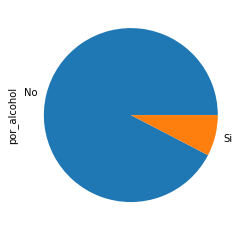

In [90]:
dataAA['por_alcohol'].value_counts().plot(kind='pie')

**¿Se puede saber la cantidad de accidentes de cada tipo cuando hubo alcohol y cuando no?**

In [130]:
dataAA.groupby(['por_alcohol','tipo_de_incidente']).count()

fecha  hora  ...  lesionados  muertos
por_alcohol tipo_de_incidente               ...                     
No          Alcance             4555  4555  ...        4555     4555
            Atropello            411   411  ...         411      411
            Caída De Persona      36    36  ...          36       36
            De Frente            103   103  ...         103      103
            De Reversa           465   465  ...         465      465
            Estrellamiento      1654  1654  ...        1654     1654
            Incendio              15    15  ...          15       15
            Lateral             4622  4622  ...        4622     4622
            Múltiple               1     1  ...           1        1
            Otro                3256  3256  ...        3256     3256
            Salida Del Camino     12    12  ...          12       12
            Volcadura            151   151  ...         151      151
Si          Alcance              204   204  ...         204      204
            Atropello             35    35  ...          35       35
            Caída De Persona       1     1  ...           1        1
            Crucero                2     2  ...           2        2
            De Frente             33    33  ...          33       33
            De Reversa            27    27  ...          27       27
            Estrellamiento       563   563  ...         563      563
            Lateral              134   134  ...         134      134
            Otro                 221   221  ...         221      221
            Salida Del Camino      6     6  ...           6        6
            Volcadura             35    35  ...          35       35

[23 rows x 26 columns]

**¿Podemos saber de cierta avenida, los tipos de accidentes que más lesionados causaron?**

El siguiente código de texto se puede reproducir con otras vialidades para ver las problemáticas que estas tienen respecto a las causas de sus accidentes, en el caso de Lincoln, el que tiene más accidentes.

Conociendo estos datos, se puede espera que se tomen acciones respecto a como minimizar los accidentes, como alcoholimetros, promover guardar distancia, que haya una patrulla en la zona cuidando la avenida.

In [157]:
nwdataAA = dataAA.loc[dataAA['Nombre_de_la_vialidad'] == 'Lincoln']
newdataAA = nwdataAA.loc[dataAA['causa'] != 'Otro']
grafico_accidentesLincoln = alt.Chart(newdataAA).mark_bar().encode(
    x = alt.X("causa:N", title = "Causa"), 
    y = alt.Y("sum(lesionados)", title = "Cantidad de lesionados") 
).properties(
    title = "Inspecciones por Materia",
    width = 550
)
grafico_accidentesLincoln

alt.Chart(...)

Desde el punto de vista de estadísticas, es fácil ver las vialidades en donde más se han concentrado los lesionados y muertos en los últimos años, pero buscar implementar soluciones puede ser un poco más complicado, porque también entra en juego la cultura de la vialidad de los ciudadanos, mencionando lo que es el alcohol, siguen habiendo muchos accidentes relacionados a esta bebida, los ciudadanos saben que está mal conducir bajo su influencia, pero siguen arriesgando sus vidas. Por lo que para disminuir los accidentes, hará falta más que simples señalamientos, luminaria o elementos policiacos.

Referencia principal:
http://portal.monterrey.gob.mx/transparencia/DatosAbiertos1.html